# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Konstantin Kaulen, 397150
    
    2. Laszlo Dirks, 398777
    
    3.

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [2]:
import pandas

dataset = pandas.read_csv("./dataset.csv")
sampled_data = dataset.sample(frac=0.95, random_state=397150)
sampled_data.to_csv("./sampled_data.csv")

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [3]:
# Your code
cancellation_reasons = sampled_data["CANCELLATION_REASON"]
print("Unique values for cancellation reason:", set(cancellation_reasons))
cancellations = sampled_data[sampled_data["CANCELLED"] == 1]
print("Unique Values for Cancellation Reason where flight has been cancelled", set(cancellations["CANCELLATION_REASON"]))
no_cancellations = sampled_data[sampled_data["CANCELLED"] == 0]
print("Unique Values for Cancellation Reason where flight has not been cancelled", set(no_cancellations["CANCELLATION_REASON"]))


Unique values for cancellation reason: {'N', 'D', 'A', 'B', 'C'}
Unique Values for Cancellation Reason where flight has been cancelled {'C', 'A', 'B', 'D'}
Unique Values for Cancellation Reason where flight has not been cancelled {'N'}


    Your answer:
    

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [4]:
no_null_data = sampled_data.dropna()
no_null_data.to_csv("./no_null_data.csv")
cancellation_reasons = no_null_data["CANCELLATION_REASON"]
print(set(cancellation_reasons))

{'N'}


    Your answer:
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

0.0 340.0
0.0 65.0


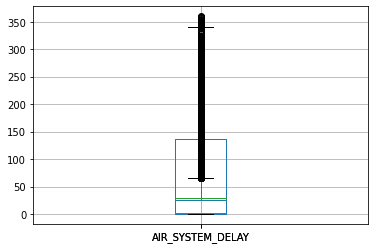

In [5]:
ev_data = no_null_data.loc[(no_null_data["AIRLINE"] == "EV") & (no_null_data["ARRIVAL_DELAY"] >= 120) & (no_null_data["ARRIVAL_DELAY"] <= 360)]
# boxplots = ev_data.boxplot(column=["AIR_SYSTEM_DELAY", "LATE_AIRCRAFT_DELAY"])
# print(boxplots)
def clean_data(dataset: pandas.DataFrame, column_name):
    boxplot_img, values = ev_data.boxplot(column=[column_name], return_type="both")
    whiskers = [whisker.get_ydata() for whisker in values["whiskers"]]
    upper_whisker = whiskers[1][1]
    lower_whisker = whiskers[0][1]
    print(lower_whisker, upper_whisker)
    return dataset.loc[(dataset[column_name] > lower_whisker) & (dataset[column_name] < upper_whisker)]

cleaned_data_late_aircraft = clean_data(ev_data, "LATE_AIRCRAFT_DELAY")
cleaned_data_air_system = clean_data(ev_data, "AIR_SYSTEM_DELAY")
cleaned_data_late_aircraft.to_csv("./cleaned_data_late_aircraft.csv")
cleaned_data_air_system.to_csv("./cleaned_data_air_system.csv")

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [6]:
for index, dataset in enumerate([ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]):
    print(index)
    arrival_delay = dataset["ARRIVAL_DELAY"]
    print("\t MEDIAN:", arrival_delay.median())
    print("\t MEAN:", arrival_delay.mean())
    print("\t MODE:", arrival_delay.mode().to_list())
    print("\t STANDARD DEVIATION:", arrival_delay.std())
    print("\t VARIANCE:", arrival_delay.var())
    
    
    

0
	 MEDIAN: 165.0
	 MEAN: 181.92060252672496
	 MODE: [121.0]
	 STANDARD DEVIATION: 55.11974094987752
	 VARIANCE: 3038.1858423816047
1
	 MEDIAN: 161.0
	 MEAN: 177.03417118449153
	 MODE: [121.0]
	 STANDARD DEVIATION: 51.17275466796622
	 VARIANCE: 2618.6508203078583
2
	 MEDIAN: 163.0
	 MEAN: 180.3658536585366
	 MODE: [121.0]
	 STANDARD DEVIATION: 54.21851738495189
	 VARIANCE: 2939.64762742233


    Your answer: 
    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

MONTH
1     56.566223
2     59.334128
3     56.871886
4     56.148108
5     60.569919
6     63.668954
7     59.460807
8     59.774049
9     54.856815
10    55.032948
11    57.589569
12    62.632459
Name: ARRIVAL_DELAY, dtype: float64

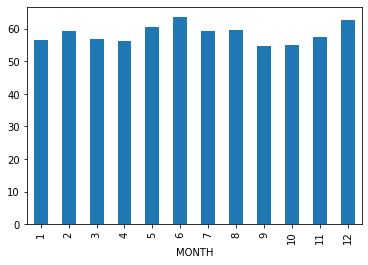

In [7]:
no_null_data.groupby(by=["MONTH"])["ARRIVAL_DELAY"].mean().plot(kind="bar")
no_null_data.groupby(by=["MONTH"])["ARRIVAL_DELAY"].mean()

    Your answer:


#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

<AxesSubplot:xlabel='MONTH'>

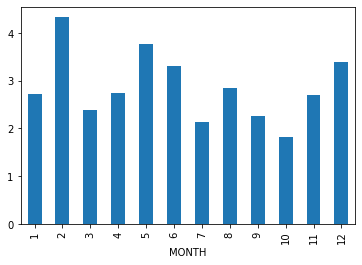

In [8]:
no_null_data.groupby(by=["MONTH"])["WEATHER_DELAY"].mean().plot(kind="bar")

    Your answer:


#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
    

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

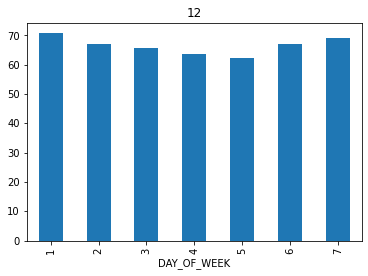

In [9]:
months = no_null_data.groupby(by=["MONTH"])
for name, group in months:
    group.groupby(by=["DAY_OF_WEEK"])["ARRIVAL_DELAY"].mean().plot(kind="bar", title=name).get_figure().savefig(f"./ARRIVAL_DELAY_{name}.jpg", transparent=False)

    Your answer:


#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

<AxesSubplot:>

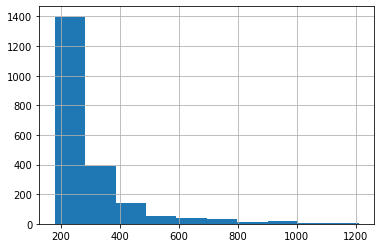

In [10]:
at_least_three_hours_of_weather_delay = no_null_data[no_null_data["WEATHER_DELAY"] >= 180]
at_least_three_hours_of_weather_delay["WEATHER_DELAY"].hist()

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

MONTH
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: WEATHER_DELAY, dtype: object

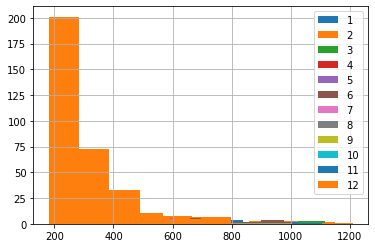

In [80]:
at_least_three_hours_of_weather_delay.groupby(["MONTH"])["WEATHER_DELAY"].hist(legend=True, stacked=True)

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

In [12]:
# Your code
# TODO

       Your answer:


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [13]:
import numpy as np

decision_tree_data = no_null_data.loc[(no_null_data["AIRLINE"] == "UA") & (no_null_data["ARRIVAL_DELAY"] > 0)]
decision_tree_data["DELAY"] = pandas.cut(x=decision_tree_data["ARRIVAL_DELAY"], bins=[0,45,np.inf], labels=["acceptable_delay", "unacceptable_delay"])
decision_tree_data["DISTANCE_CATEGORY"] = pandas.cut(x=decision_tree_data["DISTANCE"], bins=2, labels=["short", "long"])

C:\Users\THEBEA~1\AppData\Local\Temp/ipykernel_23556/264514204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decision_tree_data["DELAY"] = pandas.cut(x=decision_tree_data["ARRIVAL_DELAY"], bins=[0,45,np.inf], labels=["acceptable_delay", "unacceptable_delay"])
C:\Users\THEBEA~1\AppData\Local\Temp/ipykernel_23556/264514204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decision_tree_data["DISTANCE_CATEGORY"] = pandas.cut(x=decision_tree_data["DISTANCE"], bins=2, labels=["short", "long"])


#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

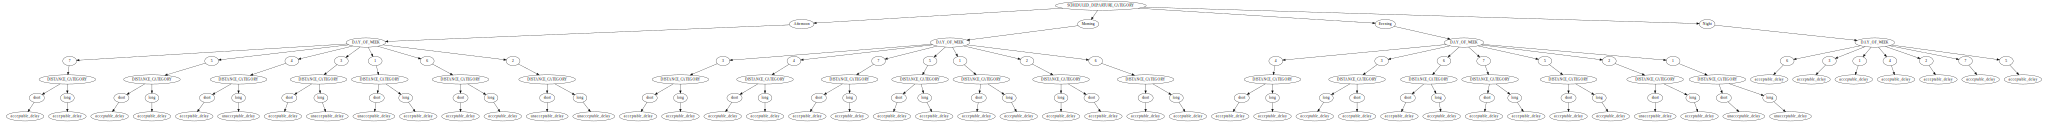

In [50]:
from IPython.display import display
from p_decision_tree.DecisionTree import DecisionTree

decision_tree_data = decision_tree_data.astype(str)

descriptive_features = ["SCHEDULED_DEPARTURE_CATEGORY", "DISTANCE_CATEGORY", "DAY_OF_WEEK"]
data_descriptive = decision_tree_data[descriptive_features].values
label = "DELAY"
label_data = decision_tree_data[label].values

tree = DecisionTree(data_descriptive.tolist(), descriptive_features, label_data.tolist(), "entropy")

tree.id3(0,1000)

tree_visualization = tree.print_visualTree(render=True)
display(tree_visualization)

#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [51]:
flights_classifying_dataset = pandas.read_csv("flights_classifying.csv")

Randomly order the data points using one of the group member's students as the random state.

In [52]:
flights_classifying_dataset = flights_classifying_dataset.sample(frac=1, random_state=397150)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [56]:
flights_classifying_dataset = flights_classifying_dataset.loc[flights_classifying_dataset["CANCELLED"]  == 0]
flights_classifying_dataset["TARGET_FEATURE"] = flights_classifying_dataset["ARRIVAL_DELAY"] > 180

505381    False
503363    False
553706     True
319261    False
13246     False
          ...  
415751    False
422211    False
166044    False
280936    False
379729    False
Name: TARGET_FEATURE, Length: 525584, dtype: bool


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [ ]:
# Your code


Split your data into training and testing data, with 85% of the dataset going to testing data.

In [ ]:
# Your code


#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [ ]:
#you may put code here, if necessary

    Your answer:
    
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [ ]:
# Your code


    Your answer:
    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [ ]:
# Your code


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [ ]:
# Your code


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [ ]:
# Your code


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [ ]:
# your code if needed

    Your answer:
    
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [63]:
clustering_data = no_null_data.loc[(no_null_data["WEATHER_DELAY"] <= 600) & (no_null_data["LATE_AIRCRAFT_DELAY"] <= 600)]
clustering_data["AIR_TIME_DELAY"] = clustering_data["ELAPSED_TIME"] - clustering_data["SCHEDULED_TIME"]
clustering_data.to_csv("clustering_dataset.csv")
print("NO ROWS:", len(clustering_data.index))
print("NO COLUMNS:", len(clustering_data.columns))
print(clustering_data[["AIR_TIME_DELAY", "SCHEDULED_TIME", "ELAPSED_TIME"]].head(10))

C:\Users\THEBEA~1\AppData\Local\Temp/ipykernel_23556/1621299773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data["AIR_TIME_DELAY"] = clustering_data["ELAPSED_TIME"] - clustering_data["SCHEDULED_TIME"]


NO ROWS: 807987
NO COLUMNS: 37
        AIR_TIME_DELAY  SCHEDULED_TIME  ELAPSED_TIME
798371            32.0           194.0         226.0
755846           -11.0           132.0         121.0
114031             3.0            73.0          76.0
184673           -12.0            95.0          83.0
912766            -2.0            95.0          93.0
516439             0.0           132.0         132.0
150443            26.0           172.0         198.0
196530            -6.0            84.0          78.0
858333            -4.0            65.0          61.0
738951           -20.0            93.0          73.0


    Your answer:
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [79]:
from sklearn.cluster import KMeans

cluster_features = clustering_data[["AIR_TIME_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY"]]

clusters = KMeans(n_clusters=5, n_init=5).fit(cluster_features)

print("CLUSTER CENTERS:", clusters.cluster_centers_)

clustering_data["CLUSTER"] = [f"c{label + 1}" for label in clusters.labels_]
for i in range(5):
    print(f"INSTANCES IN CLUSTER {i + 1}:", len(clustering_data[clustering_data["CLUSTER"] == f"c{i + 1}"]))

CLUSTER CENTERS: [[ -5.11845726   1.23792506  10.42207503]
 [ -4.10652092   2.4392009  190.27580098]
 [ -3.38822459   1.13019497  71.41913832]
 [ 27.23403447   1.40271961   2.48380282]
 [  8.79045643 150.90017086   8.31120332]]


C:\Users\THEBEA~1\AppData\Local\Temp/ipykernel_23556/1075074335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data["CLUSTER"] = [f"c{label + 1}" for label in clusters.labels_]


INSTANCES IN CLUSTER 1: 435665
INSTANCES IN CLUSTER 2: 26510
INSTANCES IN CLUSTER 3: 121777
INSTANCES IN CLUSTER 4: 215839
INSTANCES IN CLUSTER 5: 8196


    Your answer:
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

In [ ]:
# Your code


    Your answer:
    